#### 데이터분석 미션
- 과제1 : 남자/여자 수, 객실 등급별 수
- 과제2 : 연령대별 수 ( 10대 : OO명, 20대 : OO명, 30대 : OO명 )
- 과제3 : 남여별/객실등급별 생존자수를 그래프로 표현

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터 다운로드 및 분석

In [2]:
df = pd.read_csv("./data/public_data/kaggle_titanic_train.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
len(df)

891

- 남자/여자별 승객수 분석 결과
- 객실 등급별 승객수 분석 결과

result_by_sex = {
    "male" : 0,
    "female" : 0
}

result_by_pclass = {
    1 : 0,
    2 : 0,
    3 : 0
}

In [5]:
type(df['Sex'])

pandas.core.series.Series

In [6]:
len(df['Sex'])

891

In [7]:
df['Sex'][0]

'male'

In [8]:
df['Sex'][1:5]

1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [9]:
from functools import *

In [14]:
def count_columns(result_dic, element):
    if result_dic.get(element) :
        result_dic[element] += 1
        
    else:
        result_dic[element] = 1
        
    return result_dic

def get_group_count(df_column):
    return reduce(count_columns, df_column, dict())

In [15]:
result = get_group_count(df['Sex'])
result

{'male': 577, 'female': 314}

In [16]:
result = get_group_count(df['Pclass'])
result

{3: 491, 1: 216, 2: 184}

In [17]:
len(df['Sex'][df.Sex=='female'])

314

In [18]:
len(df['Pclass'][df.Pclass==1])

216

- 남자/여자 & 객실 등급별 승객수 분석 결과

In [21]:
len(df)

891

In [22]:
idx = 0
df_columns = []

element = df['Sex'][idx], df['Pclass'][idx]

df_columns.append(element)
df_columns

[('male', 3)]

In [23]:
df_columns = []

for idx in range(len(df)):
    element = df['Sex'][idx], df['Pclass'][idx]
    df_columns.append(element)
    
len(df_columns)

891

In [24]:
df_columns[:10]

[('male', 3),
 ('female', 1),
 ('female', 3),
 ('female', 1),
 ('male', 3),
 ('male', 3),
 ('male', 1),
 ('male', 3),
 ('female', 3),
 ('female', 2)]

In [26]:
def get_group_count(df_columns) :
    
    print('len(df_columns) :', len(df_columns))
    
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple
        # print(element1, ':', element2)

        if not (result_dic.get(element1)) :
            result_dic[element1] = {}
              
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result = reduce(count_columns, df_columns, dict())
    return result

In [27]:
result = get_group_count(df_columns) 
result

len(df_columns) : 891


{'male': {3: 347, 1: 122, 2: 108}, 'female': {1: 94, 3: 144, 2: 76}}

In [28]:
dict_element = result['female']
dict_element

{1: 94, 3: 144, 2: 76}

In [29]:
dict_values = [dict_element[key] for key in dict_element.keys()] 
dict_values

[94, 144, 76]

In [30]:
sum(dict_values)

314

In [31]:
count_f = []
count_m = []

for i in range(3):
    idx = i+1
    count_f.append(result['female'][idx])
    count_m.append(result['male'][idx])

In [32]:
count_f, count_m

([94, 76, 144], [122, 108, 347])

## #데이터분석결과 시각화

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

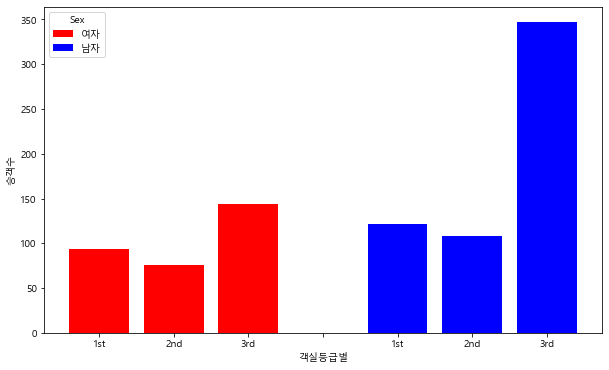

In [34]:
t1 = [ 1, 2, 3 ]
t2 = [ 5, 6, 7 ]

plt.bar(t1, count_f, color='r', label='여자')
plt.bar(t2, count_m, color='b', label='남자')
plt.xlabel('객실등급별')
plt.ylabel('승객수')
plt.legend(title='Sex')

t = list(range(1,8))
plt.xticks(t , ('1st','2nd','3rd','','1st','2nd','3rd'))   # set the locations of the xticks
plt.show()

In [35]:
count_p1 = count_f[0], count_m[0]
count_p2 = count_f[1], count_m[1]
count_p3 = count_f[2], count_m[2]

count_p1, count_p2, count_p3

((94, 122), (76, 108), (144, 347))

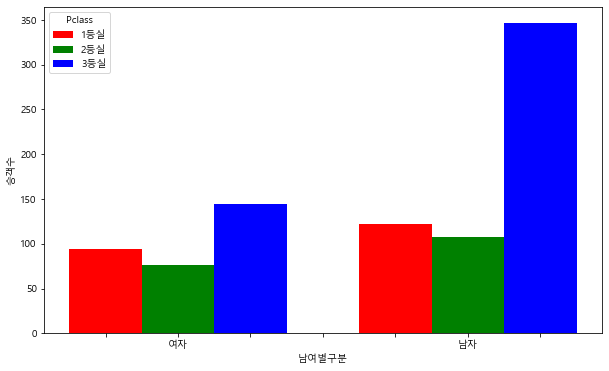

In [36]:
t1 = [ 1, 5 ]
t2 = [ 2, 6 ]
t3 = [ 3, 7 ]

plt.figure(figsize=(10,6))
plt.bar(t1, count_p1, color='r', width=1, label='1등실')
plt.bar(t2, count_p2, color='g', width=1, label='2등실')
plt.bar(t3, count_p3, color='b', width=1, label='3등실')

plt.xlabel('남여별구분')
plt.ylabel('승객수')
plt.legend(title='Pclass')

t = list(range(1,8))
# set the locations of the xticks
plt.xticks(t , ('','여자','','','','남자',''))

plt.show()

In [37]:
from pandas import Series, DataFrame

In [38]:
df_tmp = DataFrame({
            'Sex' : df.Sex,
            'Pclass' : df.Pclass
        })

df_tmp.head(10)

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3
5,male,3
6,male,1
7,male,3
8,female,3
9,female,2


In [39]:
len(df[df.Sex=='female'][df.Pclass==1])

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


94

In [40]:
df_tmp_f = df_tmp[df_tmp.Sex=='female']
df_tmp_f.head()

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2


In [41]:
df_tmp_f1 = df_tmp_f[df_tmp_f.Pclass==1]
df_tmp_f1.head()

,Sex,Pclass
1,female,1
3,female,1
11,female,1
31,female,1
52,female,1


In [42]:
len(df_tmp_f1)

94

In [43]:
df_tmp_f1[::10]

,Sex,Pclass
1,female,1
177,female,1
269,female,1
311,female,1
369,female,1
498,female,1
571,female,1
700,female,1
781,female,1
862,female,1


In [44]:
len(df_tmp)

891

In [45]:
df_tmp['Category'] = ""
df_tmp.head()

,Sex,Pclass,Category
0,male,3,
1,female,1,
2,female,3,
3,female,1,
4,male,3,


In [46]:
df_tmp.index

RangeIndex(start=0, stop=891, step=1)

In [47]:
for idx in  df_tmp.index:
    pclass = df_tmp['Pclass'][idx]
    sex    = df_tmp['Sex'][idx]
    category = '{}:{}'.format(pclass, sex)
    
    if (idx%100==0) or (idx==len(df_tmp)-1):  print(idx, '\t=>', category)
        
    # df_tmp['Category'][idx] = category
    df_tmp.Category[idx] = category

0 	=> 3:male


C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


100 	=> 3:female
200 	=> 3:male
300 	=> 3:female
400 	=> 3:male
500 	=> 3:male
600 	=> 2:female
700 	=> 1:female
800 	=> 2:male
890 	=> 3:male


In [48]:
df_tmp.head()

,Sex,Pclass,Category
0,male,3,3:male
1,female,1,1:female
2,female,3,3:female
3,female,1,1:female
4,male,3,3:male


In [49]:
df_tmp['Category'].unique()

array(['3:male', '1:female', '3:female', '1:male', '2:female', '2:male'],
      dtype=object)

In [50]:
len(df_tmp[df_tmp['Category']=='1:female'])

94

In [51]:
count_f = []
count_f.append(len(df_tmp[df_tmp['Category']=='1:female']))
count_f.append(len(df_tmp[df_tmp['Category']=='2:female']))
count_f.append(len(df_tmp[df_tmp['Category']=='3:female']))

count_f

[94, 76, 144]

In [52]:
count_m = []
count_m.append(len(df_tmp[df_tmp['Category']=='1:male']))
count_m.append(len(df_tmp[df_tmp['Category']=='2:male']))
count_m.append(len(df_tmp[df_tmp['Category']=='3:male']))

count_m

[122, 108, 347]

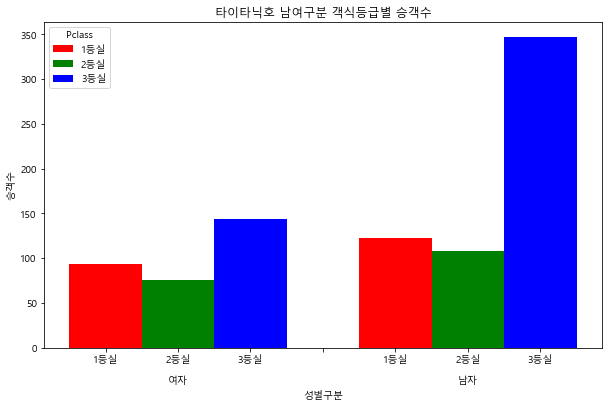

In [53]:
t1 = [ 1, 5 ]
t2 = [ 2, 6 ]
t3 = [ 3, 7 ]

plt.figure(figsize=(10,6))
plt.bar(t1, count_p1, color='r', width=1, label='1등실')
plt.bar(t2, count_p2, color='g', width=1, label='2등실')
plt.bar(t3, count_p3, color='b', width=1, label='3등실')
plt.title('타이타닉호 남여구분 객식등급별 승객수')
plt.xlabel('성별구분')
plt.ylabel('승객수')
plt.legend(title='Pclass')

t = list(range(1,8))
# set the locations of the xticks
# plt.xticks(t , ('','여자','','','','남자',''))   
plt.xticks(t , ('1등실','2등실\n\n여자','3등실','','1등실','2등실\n\n남자','3등실'))   
plt.show()

In [54]:
# count_all = count_f.copy()
count_all = [0]
count_all.extend(count_f)
count_all.append(0)
count_all.extend(count_m)
count_all

[0, 94, 76, 144, 0, 122, 108, 347]

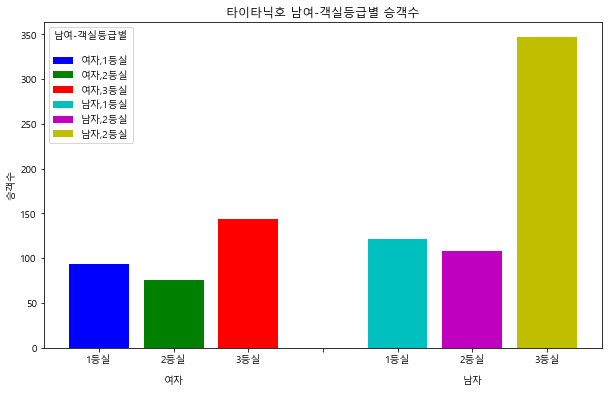

In [55]:
plt.figure(figsize=(10,6))

colors = ['w' , 'b', 'g', 'r', 'w', 'c', 'm', 'y', 'w', 'k' ]
labels = ['', '여자,1등실', '여자,2등실', '여자,3등실', '', '남자,1등실', '남자,2등실', '남자,2등실']
# xticks = ('', '여자','','','','남자','' )
xticks = ('1등실', '2등실\n\n여자','3등실','','1등실','2등실\n\n남자','3등실' )
t = list(range(1,8))

for idx in range(1, 8):
    plt.bar(idx, count_all[idx], color=colors[idx], width=0.8, label=labels[idx])

plt.title('타이타닉호 남여-객실등급별 승객수')
plt.ylabel('승객수')
plt.legend(title='남여-객실등급별\n')

plt.xticks(t , xticks)   # set the locations of the xticks
plt.show()
